## Schmitt-Grohé y Uribe (Cap. 2)

In [1]:
using Plots

### Stationary Income Shocks: AR(1)

In [2]:
ρ = 0.95
r = 0.1

n = 50;

$ y_t = \rho y_{t+1} $

$ E_t y_{t+j} = \rho^j y_t $

In [3]:
ε0 = 1

1

In [4]:
y_t(t) = ρ^t * ε0

y_t (generic function with 1 method)

In [5]:
x = [i for i in 0:n];

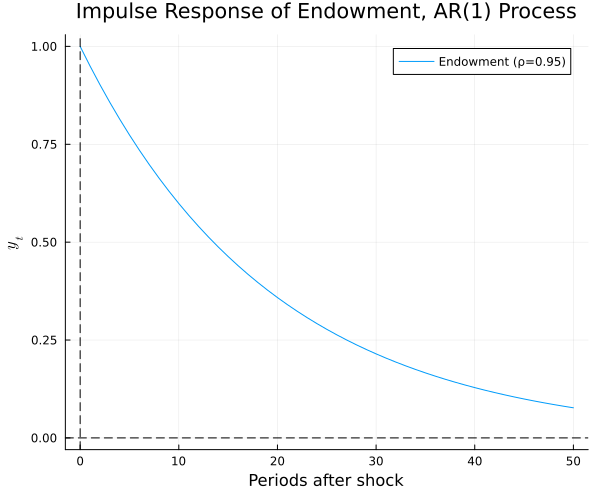

In [6]:
plot(size=(600, 500), title="Impulse Response of Endowment, AR(1) Process")
plot!(x, y_t, label="Endowment (ρ=$ρ)", xlab="Periods after shock", ylab="\$y_t\$")

hline!([0], linestyle=:dash, color=:black, label=false)
vline!([0], linestyle=:dash, color=:black, label=false)

In [7]:
yp_t(t) = r/(1+r-ρ) * y_t(t)

yp_t (generic function with 1 method)

In [8]:
function d_t(t, d_1=0)
    if t==-1
        return d_1
    else
        return d_t(t-1) + yp_t(t) - y_t(t)
    end
end

d_t (generic function with 2 methods)

In [9]:
c_t(t) = yp_t(t) - r*d_t(t-1)

c_t (generic function with 1 method)

In [10]:
tb_t(t) = y_t(t) - c_t(t)

tb_t (generic function with 1 method)

In [11]:
ca_t(t) = tb_t(t) - r*d_t(t-1)

ca_t (generic function with 1 method)

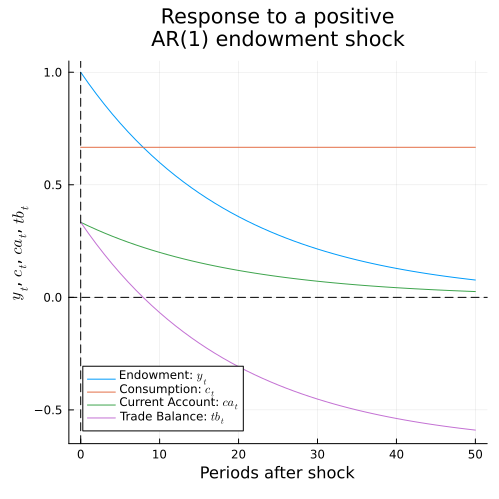

In [12]:
plot(size=(500, 500), ylim=[-0.65, 1.05], title="Response to a positive\nAR(1) endowment shock",
    xlab="Periods after shock", ylab="\$y_t\$, \$c_t\$, \$ca_t\$, \$tb_t\$")

plot!(x, y_t, label="Endowment: \$y_t\$")
plot!(x, c_t, label="Consumption: \$c_t\$")
plot!(x, ca_t, label="Current Account: \$ca_t\$")
plot!(x, tb_t, label="Trade Balance: \$tb_t\$")

# plot!(x, yp_t)

hline!([0], linestyle=:dash, color=:black, label=false)
vline!([0], linestyle=:dash, color=:black, label=false)

In [13]:
discounted_d_t(t) = d_t(t)/((1+r)^t)

discounted_d_t (generic function with 1 method)

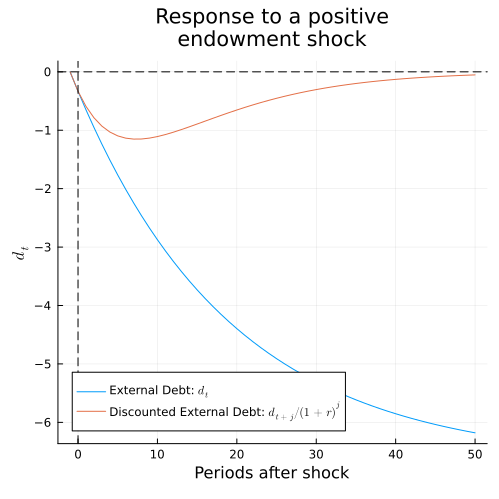

In [14]:
plot(size=(500, 500), title="Response to a positive\nendowment shock",
    xlab="Periods after shock", ylab="\$d_t\$")
plot!(-1:50, d_t, label="External Debt: \$d_t\$")
plot!(-1:50, discounted_d_t, label="Discounted External Debt: \$d_{t+j}/(1+r)^j\$")


hline!([0], linestyle=:dash, color=:black, label=false)
vline!([0], linestyle=:dash, color=:black, label=false)

### Stationary Income Shocks: AR(2)

In [15]:
ρ1 = 1.5
ρ2 = -0.51

-0.51

$ y_t = \rho_1 y_{t-1} + \rho_2 y_{t-2} $

$ E_t Y_{t+j} = R^j Y_t $

$ E_t \begin{bmatrix} y_{t+j} \\ y_{t+j-1} \end{bmatrix} = \begin{bmatrix} \rho_1 & \rho_2 \\ 1 & 0 \end{bmatrix}^{j} \begin{bmatrix} y_{t+1} \\ y_t \end{bmatrix} $ 

In [16]:
y2_t(t) = ([ρ1 ρ2; 1 0]^t * [1; 0])[1]

y2_t (generic function with 1 method)

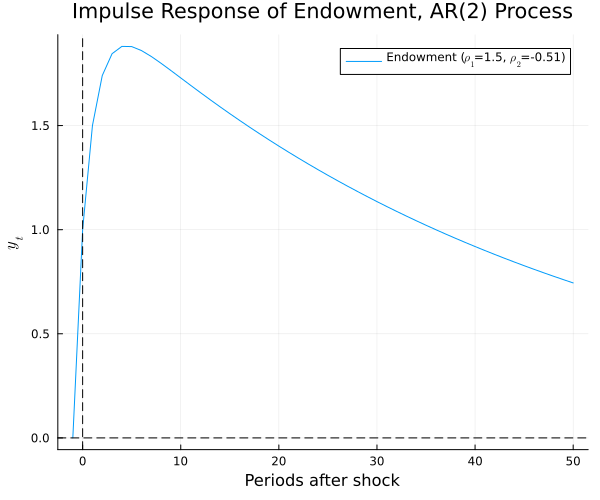

In [17]:
plot(size=(600, 500), title="Impulse Response of Endowment, AR(2) Process")
plot!([i for i in -1:n], y2_t, label="Endowment (\$ρ_1\$=$ρ1, \$ρ_2\$=$ρ2)", xlab="Periods after shock", ylab="\$y_t\$")

hline!([0], linestyle=:dash, color=:black, label=false)
vline!([0], linestyle=:dash, color=:black, label=false)

In [18]:
yp2_t(t) = r*((1+r)*y2_t(t) + ρ2*y2_t(t-1))/((1+r-ρ1)*(1+r) - ρ2)

yp2_t (generic function with 1 method)

In [19]:
function d2_t(t, d_1=0)
    if t==-1
        return d_1
    else
        return d2_t(t-1) + yp2_t(t) - y2_t(t)
    end
end

d2_t (generic function with 2 methods)

In [20]:
c2_t(t) = yp2_t(t) - r*d2_t(t-1)

c2_t (generic function with 1 method)

In [21]:
tb2_t(t) = y2_t(t) - c2_t(t)

tb2_t (generic function with 1 method)

In [22]:
ca2_t(t) = tb2_t(t) - r*d2_t(t-1)

ca2_t (generic function with 1 method)

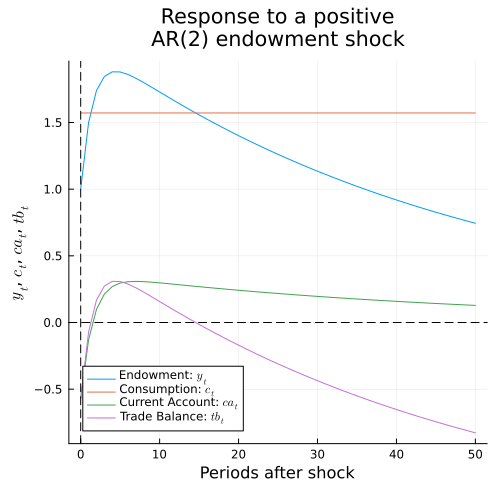

In [23]:
plot(size=(500, 500), title="Response to a positive\nAR(2) endowment shock",
    xlab="Periods after shock", ylab="\$y_t\$, \$c_t\$, \$ca_t\$, \$tb_t\$")

plot!(x, y2_t, label="Endowment: \$y_t\$")
plot!(x, c2_t, label="Consumption: \$c_t\$")
plot!(x, ca2_t, label="Current Account: \$ca_t\$")
plot!(x, tb2_t, label="Trade Balance: \$tb_t\$")

hline!([0], linestyle=:dash, color=:black, label=false)
vline!([0], linestyle=:dash, color=:black, label=false)

In [24]:
discounted_d2_t(t) = d2_t(t)/((1+r)^t)

discounted_d2_t (generic function with 1 method)

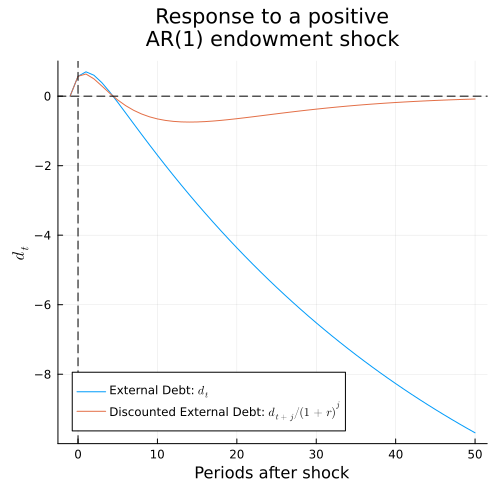

In [25]:
plot(size=(500, 500), title="Response to a positive\nAR(1) endowment shock",
    xlab="Periods after shock", ylab="\$d_t\$")
plot!([i for i in -1:n], d2_t, label="External Debt: \$d_t\$")
plot!([i for i in -1:n], discounted_d2_t, label="Discounted External Debt: \$d_{t+j}/(1+r)^j\$")

hline!([0], linestyle=:dash, color=:black, label=false)
vline!([0], linestyle=:dash, color=:black, label=false)

### Nonstationary Income Shocks

In [26]:
σΔc_σΔy(ρ) = (1+r)/(1+r-ρ) * sqrt(1 - ρ^2)

σΔc_σΔy (generic function with 1 method)

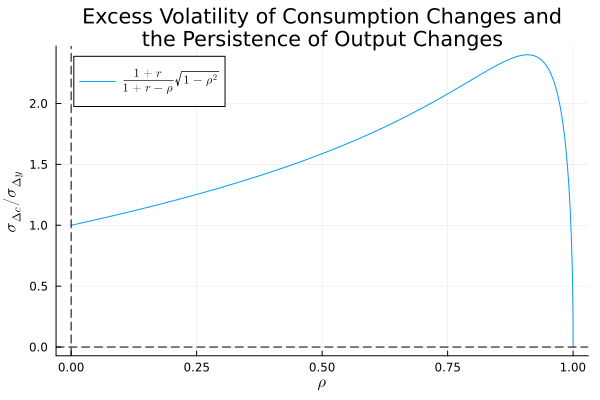

In [27]:
plot(σΔc_σΔy, 0, 1, title="Excess Volatility of Consumption Changes and\nthe Persistence of Output Changes",
    xlab="\$ρ\$", ylab="\$σ_{Δc}/σ_{Δy}\$", label="\$ \\frac{1+r}{1+r-ρ} \\sqrt{1-ρ^2} \$")

hline!([0], linestyle=:dash, color=:black, label=false)
vline!([0], linestyle=:dash, color=:black, label=false)